<h3 style="text-align:center; font-size:36px; color:black; font-weight:bold">Credit Score Case</h3>
<h3 style="text-align:center; font-size:26px; color:black">Exploratory Data Analysis</h3>

---

# 1. Importing libraries

In [21]:
import os as os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# 2. Descriptive Analysis

## 2.1. Reading the Data

In [9]:
file = os.path.join('data','training_data.csv')
df = pd.read_csv(file)
df.head(5)

,Default,UIS,age,NTD3059,RDW,MW,OCL,NTDGT90,NB,NTD6089,ND
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2.2. Pre Analysis

### 2.2.1. Proportions of Nulls 

In [17]:
null_prop = df.isnull().mean()
pd.DataFrame(null_prop).transpose()

,Default,UIS,age,NTD3059,RDW,MW,OCL,NTDGT90,NB,NTD6089,ND
0,0.0,0.0,0.0,0.0,0.0,0.197845,0.0,0.0,0.0,0.0,0.026164


As we can see the variables MW (Monthly Wage) and ND (Number of Dependants) have the following proportion of nulls, 
20% and 3% respectively.

### 2.2.2. Resume Measurements 

In [18]:
desc_round = df.describe().round(2)
desc_round

,Default,UIS,age,NTD3059,RDW,MW,OCL,NTDGT90,NB,NTD6089,ND
count,110000.00,110000.00,110000.00,110000.00,110000.00,88237.00,110000.00,110000.00,110000.00,110000.00,107122.00
mean,0.07,5.93,52.26,0.42,354.82,6637.41,8.45,0.27,1.02,0.24,0.76
std,0.25,252.30,14.77,4.24,2074.14,13383.95,5.14,4.22,1.14,4.20,1.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.16,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,8225.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


Above, the resume measurements is presented giving us a general overview of the data base, as one can see, most of the columns presents a certain skill toward higher or lower values, as we shown by comparing the mean to the median (50%). Variables such as:

* UIS
* NTD3059
* RDW
* NTDGT90
* NTD6089
* ND
    
are skwed toward higher lower values or left skewed.

The others

* age
* MW
* NB

apparently have a more gaussian or normal distribution, without greater skills.

### 2.2.3. Density Distribution

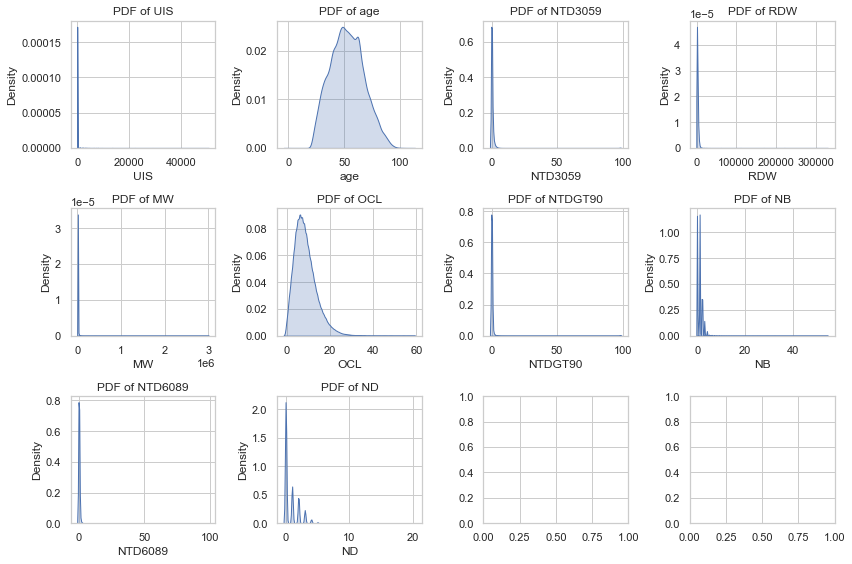

In [25]:
sns.set(style="whitegrid")

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots with 4 columns per row
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each column and plot the PDF
for i, column in enumerate(df.columns[1:]):
    sns.kdeplot(data=df[column], ax=axes[i], fill=True)
    axes[i].set_title(f'PDF of {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()